# Cirrhosis prediction model 

## Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset

In [2]:
df = pd.read_csv('Model ci.csv', index_col=0)
df['Month 1 (% Disease)'] = df['Month 1 (% Disease)'].astype(str).str.rstrip('%').astype(float) / 100

In [3]:
df.head()

,Month 1 (Age),Month 1 (ALT),Month 1 (AST),Month 1 (Bilirubin),Month 1 (Albumin),Month 1 (Platelets),Month 1 (BMI),Month 1 (Sodium),Month 1 (Hemoglobin),Month 1 (% Disease),...,Month 3 (Age),Month 3 (ALT),Month 3 (AST),Month 3 (Bilirubin),Month 3 (Albumin),Month 3 (Platelets),Month 3 (BMI),Month 3 (Sodium),Month 3 (Hemoglobin),Month 3 (% Disease)
Patient ID,,,,,,,,,,,,,,,,,,,,,
1,60,75,30,1.0,4.0,150,24.0,140,14.0,0.10,...,61,80,31,1.1,4.1,140,24.2,139,14.2,14%
2,55,60,25,0.8,4.5,180,23.0,142,15.0,0.05,...,57,70,24,0.7,4.4,170,22.8,140,15.1,9%
3,62,90,35,1.5,3.8,130,25.0,138,13.5,0.15,...,63,95,36,1.7,3.6,125,25.3,137,12.9,18%
4,70,50,22,0.6,4.0,160,26.0,145,13.8,0.08,...,72,55,20,0.6,4.0,156,26.1,143,13.7,11%
5,68,45,20,0.5,4.2,165,27.0,146,14.2,0.06,...,70,50,19,0.5,4.1,160,27.2,144,14.0,8%


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10 entries, 1 to 10
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Month 1 (Age)         10 non-null     int64  
 1   Month 1 (ALT)         10 non-null     int64  
 2   Month 1 (AST)         10 non-null     int64  
 3   Month 1 (Bilirubin)   10 non-null     float64
 4   Month 1 (Albumin)     10 non-null     float64
 5   Month 1 (Platelets)   10 non-null     int64  
 6   Month 1 (BMI)         10 non-null     float64
 7   Month 1 (Sodium)      10 non-null     int64  
 8   Month 1 (Hemoglobin)  10 non-null     float64
 9   Month 1 (% Disease)   10 non-null     float64
 10  Month 2 (Age)         10 non-null     int64  
 11  Month 2 (ALT)         10 non-null     int64  
 12  Month 2 (AST)         10 non-null     int64  
 13  Month 2 (Bilirubin)   10 non-null     float64
 14  Month 2 (Albumin)     10 non-null     float64
 15  Month 2 (Platelets)   10 non-n

In [5]:
df.describe()

,Month 1 (Age),Month 1 (ALT),Month 1 (AST),Month 1 (Bilirubin),Month 1 (Albumin),Month 1 (Platelets),Month 1 (BMI),Month 1 (Sodium),Month 1 (Hemoglobin),Month 1 (% Disease),...,Month 2 (Hemoglobin),Month 3 (Age),Month 3 (ALT),Month 3 (AST),Month 3 (Bilirubin),Month 3 (Albumin),Month 3 (Platelets),Month 3 (BMI),Month 3 (Sodium),Month 3 (Hemoglobin)
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.00000,10.000000,10.000000,10.000000,...,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.0000,10.000000,10.000000,10.000000
mean,65.200000,66.000000,27.400000,0.900000,4.030000,159.500000,24.80000,142.200000,14.100000,0.090000,...,14.230000,67.000000,71.400000,26.700000,0.980000,3.960000,151.7000,25.120000,140.200000,13.940000
std,6.545567,17.126977,5.796551,0.355903,0.275076,18.476712,1.47573,3.011091,0.998888,0.037417,...,1.134362,6.699917,17.180092,6.600505,0.449197,0.343835,18.1356,1.496514,2.859681,1.167333
min,55.000000,40.000000,19.000000,0.400000,3.500000,130.000000,22.50000,138.000000,12.000000,0.040000,...,11.800000,57.000000,44.000000,18.000000,0.400000,3.300000,125.0000,22.800000,137.000000,11.500000
25%,60.500000,52.500000,22.750000,0.650000,3.925000,150.000000,24.00000,140.250000,13.575000,0.062500,...,13.850000,61.500000,58.750000,21.000000,0.625000,3.775000,140.0000,24.350000,138.250000,13.475000
50%,65.500000,67.500000,28.000000,0.850000,4.000000,157.500000,24.75000,141.500000,14.100000,0.085000,...,14.400000,67.500000,72.500000,26.000000,0.950000,4.000000,152.0000,25.150000,139.500000,14.050000
75%,69.500000,78.750000,32.250000,1.150000,4.175000,172.500000,25.87500,144.500000,14.875000,0.115000,...,15.025000,71.500000,83.750000,31.750000,1.325000,4.100000,166.0000,26.025000,142.250000,14.875000
max,75.000000,90.000000,35.000000,1.500000,4.500000,190.000000,27.00000,147.000000,15.500000,0.150000,...,15.700000,77.000000,95.000000,36.000000,1.700000,4.400000,180.0000,27.200000,145.000000,15.300000


In [6]:
df.isnull().sum()

Month 1 (Age)           0
Month 1 (ALT)           0
Month 1 (AST)           0
Month 1 (Bilirubin)     0
Month 1 (Albumin)       0
Month 1 (Platelets)     0
Month 1 (BMI)           0
Month 1 (Sodium)        0
Month 1 (Hemoglobin)    0
Month 1 (% Disease)     0
Month 2 (Age)           0
Month 2 (ALT)           0
Month 2 (AST)           0
Month 2 (Bilirubin)     0
Month 2 (Albumin)       0
Month 2 (Platelets)     0
Month 2 (BMI)           0
Month 2 (Sodium)        0
Month 2 (Hemoglobin)    0
Month 2 (% Disease)     0
Month 3 (Age)           0
Month 3 (ALT)           0
Month 3 (AST)           0
Month 3 (Bilirubin)     0
Month 3 (Albumin)       0
Month 3 (Platelets)     0
Month 3 (BMI)           0
Month 3 (Sodium)        0
Month 3 (Hemoglobin)    0
Month 3 (% Disease)     0
dtype: int64

## X and y array

In [7]:
X = df[['Month 1 (Age)', 'Month 1 (ALT)', 'Month 1 (AST)', 'Month 1 (Bilirubin)', 
        'Month 1 (Albumin)', 'Month 1 (Platelets)', 'Month 1 (BMI)', 
        'Month 1 (Sodium)', 'Month 1 (Hemoglobin)', 'Month 2 (Age)', 'Month 2 (ALT)', 'Month 2 (AST)', 'Month 2 (Bilirubin)', 
        'Month 2 (Albumin)', 'Month 2 (Platelets)', 'Month 2 (BMI)', 
        'Month 2 (Sodium)', 'Month 2 (Hemoglobin)', 'Month 3 (Age)', 'Month 3 (ALT)', 'Month 3 (AST)', 'Month 3 (Bilirubin)', 
        'Month 3 (Albumin)', 'Month 3 (Platelets)', 'Month 3 (BMI)', 
        'Month 3 (Sodium)', 'Month 3 (Hemoglobin)']].iloc[0].values
y = df[['Month 1 (% Disease)', 'Month 2 (% Disease)', 'Month 3 (% Disease)']].iloc[0].values

In [8]:
X

array([ 60. ,  75. ,  30. ,   1. ,   4. , 150. ,  24. , 140. ,  14. ,
        60. ,  78. ,  32. ,   1.2,   4.2, 145. ,  24.5, 138. ,  14.5,
        61. ,  80. ,  31. ,   1.1,   4.1, 140. ,  24.2, 139. ,  14.2])

In [14]:
y

array([0.1, '12%', '14%'], dtype=object)

In [16]:
import pandas as pd
import numpy as np

# Convert X to a DataFrame 
if isinstance(X, np.ndarray):
    X = pd.DataFrame(X)

# Convert y to a Series 
if isinstance(y, np.ndarray):
    y = pd.Series(y, name="target") 

Type of X: <class 'pandas.core.frame.DataFrame'>
Type of y: <class 'pandas.core.series.Series'>
Concatenation successful!


## Train Test Split

In [10]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feauture Selection

### Correlation

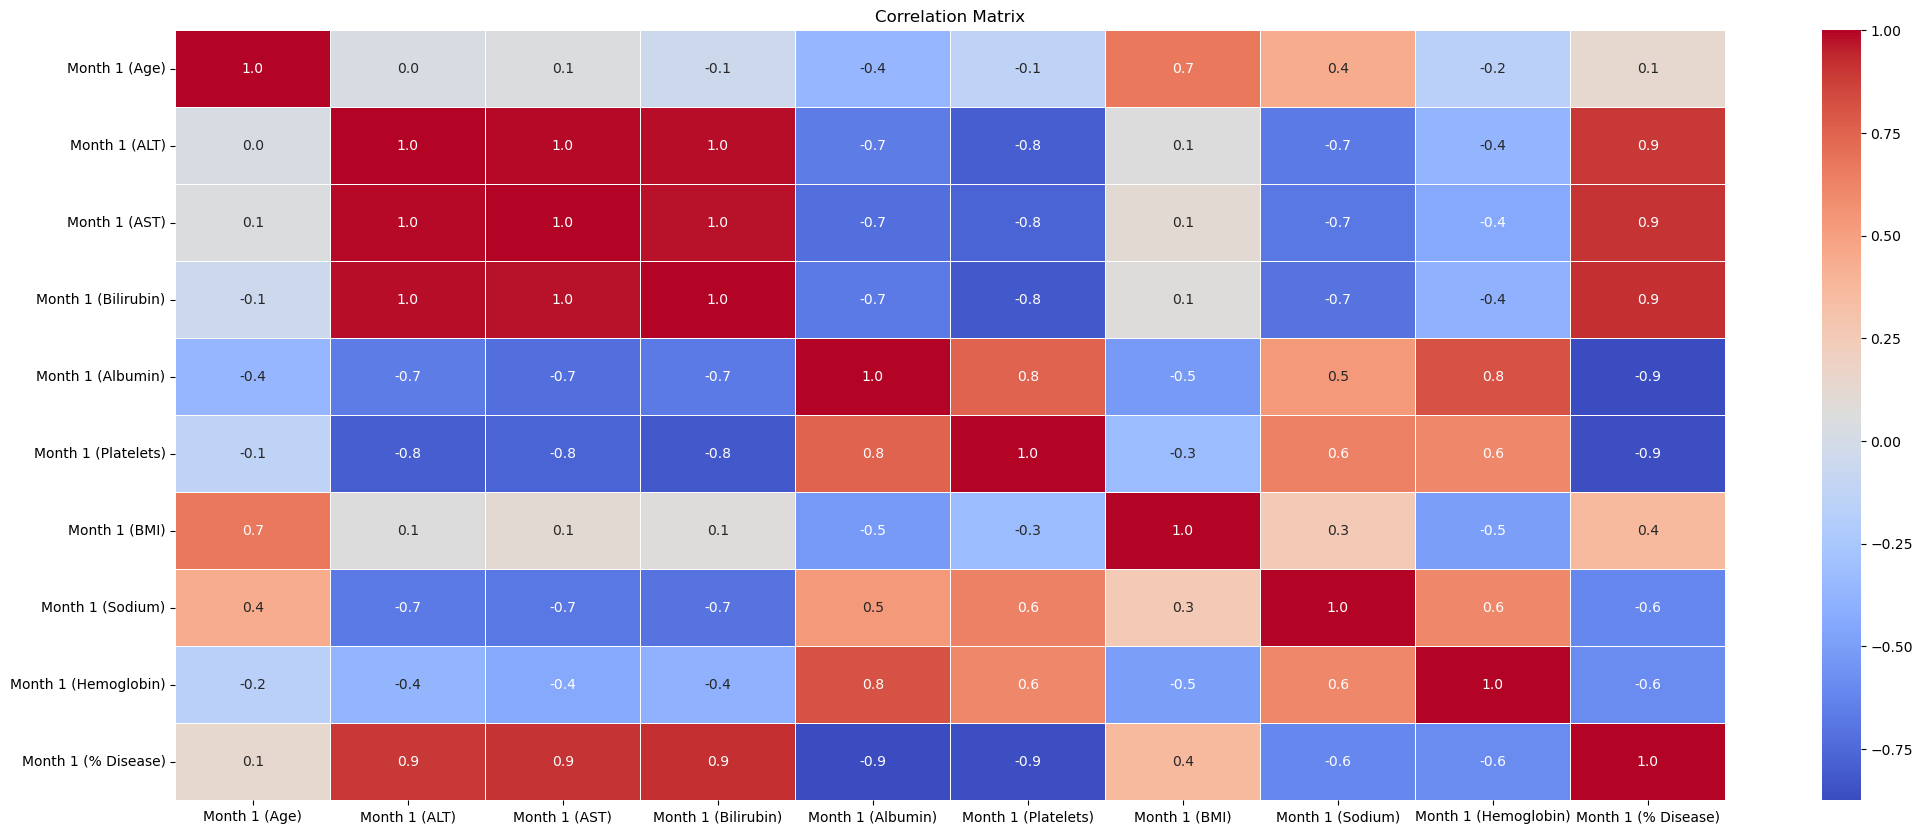

In [109]:
# Calculate the correlation
combined_data = pd.concat([X, y], axis=1)
corr = combined_data.corr()

# Plot heatmap
plt.figure(figsize=(25, 10))
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5, fmt='0.1f')
plt.title('Correlation Matrix')
plt.show()

## 1) Recursive feature elimination (RFE) with random forest

In [110]:
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestRegressor

In [111]:
estimator = RandomForestRegressor(n_estimators=100, random_state=42)
rfe = RFE(estimator=estimator, n_features_to_select=5, step=1)
rfe.fit(X_train, y_train)

# Print the selected features
print('Selected Features:', X.columns[rfe.support_])

# Get the ranking of the features
ranking = rfe.ranking_

feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': ranking
}).sort_values(by='Ranking', ascending=True)

print(feature_ranking)

Selected Features: Index(['Month 1 (ALT)', 'Month 1 (AST)', 'Month 1 (Bilirubin)',
       'Month 1 (Albumin)', 'Month 1 (Platelets)'],
      dtype='object')
                Feature  Ranking
1         Month 1 (ALT)        1
2         Month 1 (AST)        1
3   Month 1 (Bilirubin)        1
4     Month 1 (Albumin)        1
5   Month 1 (Platelets)        1
8  Month 1 (Hemoglobin)        2
7      Month 1 (Sodium)        3
0         Month 1 (Age)        4
6         Month 1 (BMI)        5


## 2) Recursive feature elimination with cross validation and random forest classification

In [112]:
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestRegressor

In [113]:
estimator = RandomForestRegressor(n_estimators=100, random_state=42)
rfecv = RFECV(estimator=estimator, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv.fit(X_train, y_train)

# Print the optimal number of features
print('Optimal number of features:', rfecv.n_features_)

# Print the best features
print('Best features:', X_train.columns[rfecv.support_])

# Get ranking of features
ranking = rfecv.ranking_
feature_ranking = pd.DataFrame({
    'Feature': X_train.columns,
    'Ranking': ranking
}).sort_values(by='Ranking')

print('Feature ranking:')
print(feature_ranking)

Optimal number of features: 4
Best features: Index(['Month 1 (ALT)', 'Month 1 (AST)', 'Month 1 (Albumin)',
       'Month 1 (Platelets)'],
      dtype='object')
Feature ranking:
                Feature  Ranking
1         Month 1 (ALT)        1
2         Month 1 (AST)        1
4     Month 1 (Albumin)        1
5   Month 1 (Platelets)        1
3   Month 1 (Bilirubin)        2
8  Month 1 (Hemoglobin)        3
7      Month 1 (Sodium)        4
0         Month 1 (Age)        5
6         Month 1 (BMI)        6


## 3) Lasso Regularization (L1)

In [114]:
from sklearn.linear_model import Lasso

In [115]:
lasso = Lasso(alpha=0.001)
lasso.fit(X_train, y_train)

# Get the coefficients and feature names
coefficients = lasso.coef_
features = X_train.columns

# Create a DataFrame to hold the features and their coefficients
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': coefficients
})

# Select non-zero coefficients
non_zero_features = feature_importance[feature_importance['Coefficient'] != 0]

# Sort by the absolute value of the coefficient to get the most important features
sorted_features = non_zero_features.reindex(non_zero_features.Coefficient.abs().sort_values(ascending=False).index)

# Select the top 5 features
top_5_features = sorted_features.head()

print('Top 5 Selected Features:')
print(top_5_features)

Top 5 Selected Features:
               Feature  Coefficient
2        Month 1 (AST)     0.004182
6        Month 1 (BMI)     0.003437
7     Month 1 (Sodium)     0.002185
0        Month 1 (Age)    -0.001362
5  Month 1 (Platelets)    -0.000644


C:\Users\Lenovo\anaconda3\envs\slenv\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:697: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.983e-06, tolerance: 8.487e-07
  model = cd_fast.enet_coordinate_descent(


## 4) Principal Component Analysis (PCA)

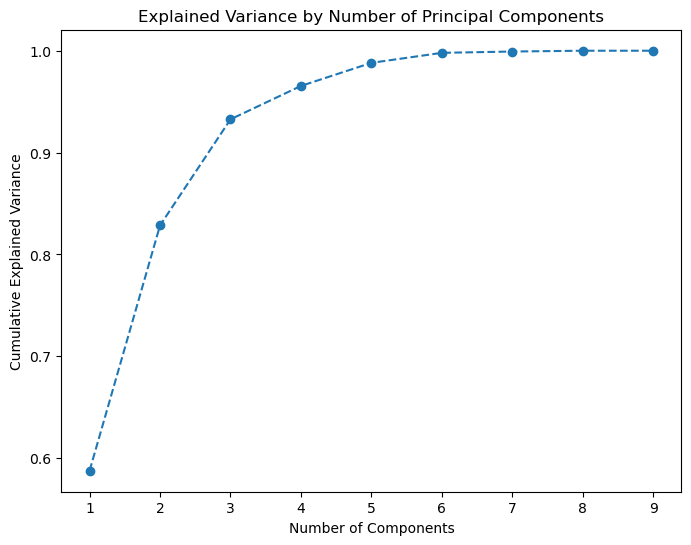

   Month 1 (Age)  Month 1 (ALT)  Month 1 (AST)  Month 1 (Bilirubin)  \
0       0.042975       0.398004       0.405149             0.401763   
1       0.592633      -0.137439      -0.104497            -0.156327   
2       0.340990       0.348871       0.293904             0.282536   
3      -0.541743      -0.017050      -0.131507             0.154890   
4      -0.354910       0.117422       0.306908             0.147780   
5       0.282864       0.161858       0.137096             0.039816   
6       0.174308      -0.414084      -0.332187             0.675566   
7      -0.028611      -0.096364      -0.090144             0.478790   
8      -0.002108      -0.692794       0.699857            -0.035748   

   Month 1 (Albumin)  Month 1 (Platelets)  Month 1 (BMI)  Month 1 (Sodium)  \
0          -0.379206            -0.393726       0.121091         -0.329625   
1          -0.241845            -0.045611       0.605860          0.346629   
2           0.161511            -0.011836      -0.05508

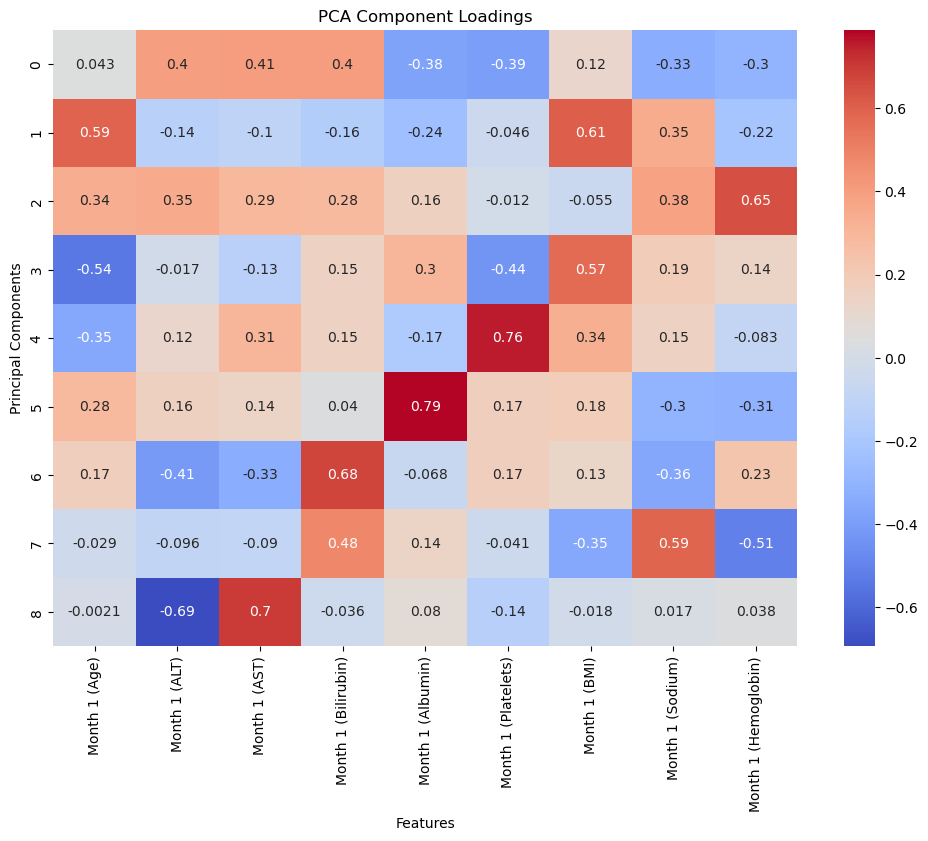

Optimal number of components: 4
   Month 1 (Age)  Month 1 (ALT)  Month 1 (AST)  Month 1 (Bilirubin)  \
0       0.042975       0.398004       0.405149             0.401763   
1       0.592633      -0.137439      -0.104497            -0.156327   
2       0.340990       0.348871       0.293904             0.282536   
3      -0.541743      -0.017050      -0.131507             0.154890   

   Month 1 (Albumin)  Month 1 (Platelets)  Month 1 (BMI)  Month 1 (Sodium)  \
0          -0.379206            -0.393726       0.121091         -0.329625   
1          -0.241845            -0.045611       0.605860          0.346629   
2           0.161511            -0.011836      -0.055086          0.382970   
3           0.303065            -0.436001       0.572229          0.190302   

   Month 1 (Hemoglobin)  
0             -0.303404  
1             -0.216220  
2              0.647984  
3              0.139044  
Top features for each principal component:
0           Month 1 (AST)
1           Month 1 (B

In [116]:
# Standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=None)  # Keep all components initially
X_pca = pca.fit(X_scaled)

# Plot the explained variance to find the optimal number of components
explained_variance = pca.explained_variance_ratio_

plt.figure(figsize=(8, 6))
plt.plot(range(1, len(explained_variance) + 1), explained_variance.cumsum(), marker='o', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Explained Variance by Number of Principal Components')
plt.show()

# To see the components and their contributions to each feature
components_df = pd.DataFrame(pca.components_, columns=X.columns)
print(components_df)

# Heatmap of the loadings
plt.figure(figsize=(12, 8))
sns.heatmap(components_df, cmap='coolwarm', annot=True)
plt.title('PCA Component Loadings')
plt.xlabel('Features')
plt.ylabel('Principal Components')
plt.show()

# Selecting the number of components that explain most variance, e.g., 95%
optimal_components = PCA(n_components=0.95)
X_pca_optimal = optimal_components.fit_transform(X_scaled)

print(f'Optimal number of components: {optimal_components.n_components_}')

# Get the loadings for the optimal components
optimal_components_df = pd.DataFrame(optimal_components.components_, columns=X.columns)
print(optimal_components_df)

# Identify top features for each principal component
top_features = optimal_components_df.abs().idxmax(axis=1)
print('Top features for each principal component:')
print(top_features)

## 5) Random Forest Feature Importance

In [117]:
from sklearn.ensemble import RandomForestRegressor

                Feature  Importance
2         Month 1 (AST)    0.191808
1         Month 1 (ALT)    0.182268
4     Month 1 (Albumin)    0.164550
3   Month 1 (Bilirubin)    0.154141
5   Month 1 (Platelets)    0.112114
7      Month 1 (Sodium)    0.094055
0         Month 1 (Age)    0.047455
6         Month 1 (BMI)    0.032225
8  Month 1 (Hemoglobin)    0.021383


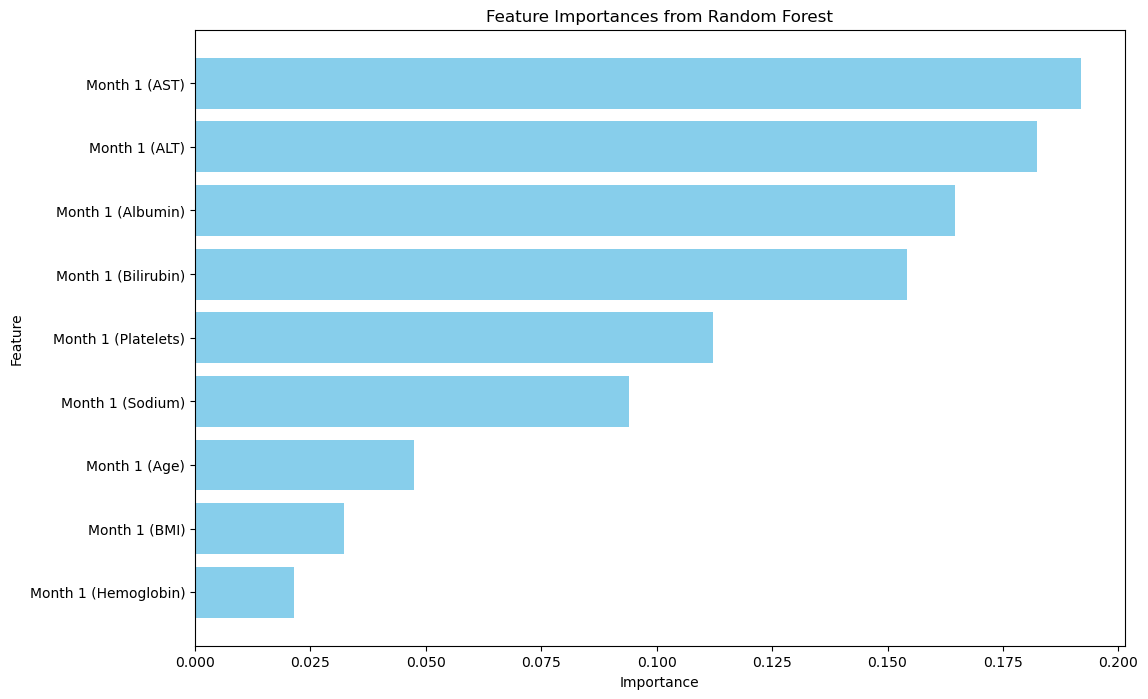

In [118]:
# Initialize and train the RandomForestRegressor
estimator = RandomForestRegressor(n_estimators=100, random_state=42)
estimator.fit(X, y)

# Get feature importances
importances = estimator.feature_importances_

# Create a DataFrame for the features and their importance scores
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print(feature_importances)

# Plot the feature importances
plt.figure(figsize=(12, 8))
plt.barh(feature_importances['Feature'], feature_importances['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances from Random Forest')
plt.gca().invert_yaxis()
plt.show()

## Model Selection

### Random Forest


In [119]:
# Select features and target
X = df[['Month 1 (Age)', 'Month 1 (ALT)', 'Month 1 (AST)', 'Month 1 (Bilirubin)', 
        'Month 1 (Albumin)', 'Month 1 (Platelets)', 'Month 1 (BMI)', 
        'Month 1 (Sodium)', 'Month 1 (Hemoglobin)']]
y = df['Month 1 (% Disease)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evalution
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# R-squared (R²) Score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Absolute Error: 0.016600000000000004
Mean Squared Error: 0.0004249666666666671
Root Mean Squared Error: 0.020614719660152235
R-squared: 0.7145746268656714


### XGBoost

In [120]:
# Select features and target
X = df[['Month 1 (Age)', 'Month 1 (ALT)', 'Month 1 (AST)', 'Month 1 (Bilirubin)', 
        'Month 1 (Albumin)', 'Month 1 (Platelets)', 'Month 1 (BMI)', 
        'Month 1 (Sodium)', 'Month 1 (Hemoglobin)']]
y = df['Month 1 (% Disease)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the XFBoost
from xgboost import XGBRegressor
model = XGBRegressor()
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evalution
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# R-squared (R²) Score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Absolute Error: 0.00925934553146363
Mean Squared Error: 0.0001113366378089361
Root Mean Squared Error: 0.010551617781598048
R-squared: 0.9252216611731027


### Support Vector Machines (SVM)

In [121]:
# Select features and target
X = df[['Month 1 (Age)', 'Month 1 (ALT)', 'Month 1 (AST)', 'Month 1 (Bilirubin)', 
        'Month 1 (Albumin)', 'Month 1 (Platelets)', 'Month 1 (BMI)', 
        'Month 1 (Sodium)', 'Month 1 (Hemoglobin)']]
y = df['Month 1 (% Disease)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the SVM
from sklearn.svm import SVR
model = SVR(kernel='rbf')
model.fit(X_train, y_train)

# Prediction
y_pred = model.predict(X_test)

# Evalution
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# R-squared (R²) Score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Absolute Error: 0.045000000000000005
Mean Squared Error: 0.0020250000000000008
Root Mean Squared Error: 0.045000000000000005
R-squared: 0.0


### RNN and LSTM

In [122]:
import tensorflow as tf
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, LSTM

In [123]:
# Select features and target
X = df[['Month 1 (Age)', 'Month 1 (ALT)', 'Month 1 (AST)', 'Month 1 (Bilirubin)', 
        'Month 1 (Albumin)', 'Month 1 (Platelets)', 'Month 1 (BMI)', 
        'Month 1 (Sodium)', 'Month 1 (Hemoglobin)']]
y = df['Month 1 (% Disease)']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape data for LSTM [samples, time steps, features]
X_train_scaled = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_scaled = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Initialising the RNN
regressor = Sequential()

# Adding the first LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(X_train_scaled.shape[1], X_train_scaled.shape[2])))
regressor.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, activation='relu', return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, activation='relu', return_sequences=True))
regressor.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
regressor.add(LSTM(units=50, activation='relu'))
regressor.add(Dropout(0.2))

# Adding the output layer
regressor.add(Dense(units=1))
              
# Compiling the RNN
regressor.compile(optimizer = 'adam' , loss = 'mean_squared_error', metrics = ['mae'])

# Fitting
regressor.fit(x=X_train_scaled, y = y_train, epochs = 100, batch_size = 32, verbose=1)

Epoch 1/100


C:\Users\Lenovo\anaconda3\envs\slenv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - loss: 0.0090 - mae: 0.0889
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0086 - mae: 0.0867
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0083 - mae: 0.0848
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0079 - mae: 0.0829
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0076 - mae: 0.0808
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step - loss: 0.0071 - mae: 0.0778
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step - loss: 0.0068 - mae: 0.0758
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 0.0065 - mae: 0.0737
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 0.0061 - mae: 0.0711
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0058 - mae: 0.0690
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0056 - mae: 0.0671
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.0052 - mae: 0.0639
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - loss: 0.00

In [124]:
# Make predictions
y_pred = regressor.predict(X_test_scaled)

# Evalution
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# R-squared (R²) Score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 672ms/step
Mean Absolute Error: 0.01665162861347199
Mean Squared Error: 0.00027756001328424186
Root Mean Squared Error: 0.01666013245098135
R-squared: 0.862933326773214


In [125]:
# New data for the next month (Month 2)
new_data = {
    'Month 1 (Age)': [61],
    'Month 1 (ALT)': [80],
    'Month 1 (AST)': [31],
    'Month 1 (Bilirubin)': [1.1],
    'Month 1 (Albumin)': [4.2],
    'Month 1 (Platelets)': [140],
    'Month 1 (BMI)': [24.2],
    'Month 1 (Sodium)': [139],
    'Month 1 (Hemoglobin)': [14.3]
}

# Create DataFrame for the new data
new_df = pd.DataFrame(new_data)

# Scale the new data
new_data_scaled = scaler.transform(new_df)

# Reshape the new data for LSTM [samples, time steps, features]
new_data_scaled = new_data_scaled.reshape((new_data_scaled.shape[0], 1, new_data_scaled.shape[1]))

# Predict the disease progression percentage
predicted_percentage = regressor.predict(new_data_scaled)

# Simulate actual value for the evaluation (in practice, use the actual value you obtain)
actual_value = [14]  # Example actual value for Month 2

# Evalution
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score

print('Predicted Disease Percentage for next month:', predicted_percentage[0][0])
      
# Mean Absolute Error (MAE)
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

# Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)
print(f'Root Mean Squared Error: {rmse}')

# R-squared (R²) Score
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 523ms/step
Predicted Disease Percentage for next month: 0.09535636
Mean Absolute Error: 0.01665162861347199
Mean Squared Error: 0.00027756001328424186
Root Mean Squared Error: 0.01666013245098135
R-squared: 0.862933326773214


### ARIMA

In [126]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Prepare the feature (X) and target (y) variables
X = df[['Month 1 (Age)', 'Month 1 (ALT)', 'Month 1 (AST)', 'Month 1 (Bilirubin)', 
        'Month 1 (Albumin)', 'Month 1 (Platelets)', 'Month 1 (BMI)', 
        'Month 1 (Sodium)', 'Month 1 (Hemoglobin)']]
y = df['Month 1 (% Disease)']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X) 

# Train the model
model = LinearRegression()
model.fit(X_scaled, y)

LinearRegression()

In [127]:
# New data for the next month (Month 2)
new_data = {
    'Month 1 (Age)': [61],
    'Month 1 (ALT)': [80],
    'Month 1 (AST)': [31],
    'Month 1 (Bilirubin)': [1.1],
    'Month 1 (Albumin)': [4.2],
    'Month 1 (Platelets)': [140],
    'Month 1 (BMI)': [24.2],
    'Month 1 (Sodium)': [139],
    'Month 1 (Hemoglobin)': [14.3]
}

# Create DataFrame for the new data
new_df = pd.DataFrame(new_data)

# Scale the new data
new_data_scaled = scaler.transform(new_df)

# Predict the disease progression percentage
predicted_percentage = model.predict(new_data_scaled)

# Simulate actual value for the evaluation (in practice, use the actual value you obtain)
actual_value = [14]  # Example actual value for Month 2

# Evaluate the model
mae = mean_absolute_error(actual_value, predicted_percentage)
mse = mean_squared_error(actual_value, predicted_percentage)
rmse = np.sqrt(mse)
r2 = r2_score(actual_value, predicted_percentage)

# Print the evaluation metrics
print('Predicted Disease Percentage for next month:', predicted_percentage[0])
print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared: {r2}')

Predicted Disease Percentage for next month: 0.6930484822935716
Mean Absolute Error: 13.306951517706429
Mean Squared Error: 177.0749586945894
Root Mean Squared Error: 13.306951517706429
R-squared: nan


C:\Users\Lenovo\anaconda3\envs\slenv\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)
